# Q & A

# 第3回の質問

**Q. 課題４の種別に計算する方法がわかりませんでした。**

課題4: このデータフレームから"species"(種)毎に"flipper_length_mm"(ヒレの長さ)の平均値・標準偏差を計算し、その結果に基づいて種とヒレの長さの関係性について記述してください。

In [ ]:
df <- read.csv("https://raw.githubusercontent.com/slt666666/biostatistics_text_wed/refs/heads/main/source/_static/data/chapter3_penguins.csv")

Adelie <- df[df$species == "Adelie", "flipper_length_mm"]
Gentoo <- df[df$species == "Gentoo", "flipper_length_mm"]
Chinstrap <- df[df$species == "Chinstrap", "flipper_length_mm"]

print("Adelie")
mean(Adelie)
sd(Adelie)
print("Gentoo")
mean(Gentoo)
sd(Gentoo)
print("Chinstrap")
mean(Chinstrap)
sd(Chinstrap)

**Q. データを処理するソフトはExcelのイメージもかなり強いのですが、使い分けをするとしたらどういう用途で使い分けたらよいですか？また、RとExcelを連携して使うようなことはあるのでしょうか。**

A. Excelはデータのフォーマットを整えるとき等に使用することが多いです。
データの分析も出来なくは無いですが、基本的なことしか出来ない上に融通が利かないので、データを整理した後はRやPython等で解析をする流れになるかと思います。

**Q.アカデミアの世界ではpythonよりRの方が手軽でしょうか。学習効率という意味ではなく、実際にデータを解析するという点で。**

A. どちらでも出来ることはそんなに変わらない+どちらもプログラミング言語の中では簡単な方なので、データ解析に用いるという意味ではあんまり変わりは無いです。

ただ、恐らく生物系の分野では圧倒的にRを使用している人数の方が多いので、資料等にあたりやすいという利点があると思います。

**Q.不偏分散というのが初めて聞いたので理解するのが難しかった。**

A. 不偏(分散)については後の講義で触れます。

**Q.偏相関係数について求め方が非常にきになった。**

A. 例えば3つのデータ$X, Y, Z$があった際に、$Z$の影響を除いた$X, Y$の間の偏相関係数は

$X, Y$間の相関係数$r_{xy}$, $Y,Z$間の相関係数$r_{yz}$, $Z,X$間の相関係数$r_{zx}$とすると

$r_{xy\cdot z} = \dfrac{r_{xy} - r_{yz}r_{zx}}{\sqrt{1-r_{zx}}\sqrt{1-r_{yz}}}$

で求まります。

ただ、何の変数の影響を省くかを選ぶのも恣意的になる可能性があるので、難しいところです。

**Q. データフレームから一部のデータを取り出す場合、df[ , ]を使う他に、列データを取り出す場合はdf\$が使えますが、行データを取り出す場合には列データの$に相当するような記号はあるのでしょうか。**

A. 行に関しては無いはずです。

# 第4回の質問

**Q. 課題２のように違う要素を色分けするときに、グラフを一つにはできないのですか？**

A. `facet_grid`という関数を使用することで複数のグラフを並べる事が出来ます。

１つのグラフで全ての情報を出したければ、`boxplot`にする必要があるかと思います。

どちらも少しテクニックが必要なコードですが…。

In [ ]:
library(ggplot2)
df <- read.csv("https://raw.githubusercontent.com/slt666666/biostatistics_text_wed/refs/heads/main/source/_static/data/chapter3_penguins.csv")

g <- ggplot(df, aes(x=flipper_length_mm))
g <- g + geom_histogram(aes(fill=island))
g <- g + facet_grid(species ~ .)
g

In [ ]:
library(ggplot2)

g <- ggplot(df, aes(x=island, y=flipper_length_mm, colour=species))
g <- g + geom_boxplot()
g <- g +  geom_point(position = position_jitterdodge(jitter.width = 0.25))
g

**Q. 花の色と図の点の色を揃えるためのscale_colour_identity等の関数の使い方について知りたい**

A. 細かい所は自分で調べてもらうと良いですが、これも
```
g <- g + scale_colour_identity(guide = "legend")
```
みたいな形で使用します。`guide="legend"`は変数に色の名前がついていれば自動でその色にしてくれます。

In [ ]:
library(ggplot2)

df <- read.csv("https://raw.githubusercontent.com/slt666666/biostatistics_text_wed/refs/heads/main/source/_static/data/chapter3_data.csv")

g <- ggplot(df, aes(x=Height, y=Leaf_length))
g <- g + geom_point(aes(colour=Flower))
g <- g + scale_colour_identity(guide = "legend")
g

**Q. library(ggplot2)と書くのに、そのあとの関数はggplot(...)と書くのはなぜでしょう？**

A. もともと`ggplot`というパッケージで開発されていたものの、バージョン2ということだからみたいです。

**Q. クイズ(課題)の答え方が合っているのか不安です。**

A. 今出されている方は問題無いと思います。

**Q. ヴィーガンであることと、それを他人に強要することの相関係数は、いくつでしょうか。**

**(+ 他人に強要したがるという見解を披瀝するのは、それこそステレオタイプの強要にすぎないのではないかとの御意見)**

A. 確かにそれなりの人数に話す内容としては諸々主語が大きすぎましたね。

菜食主義者にも色んな方がいることは確かで、例えば宗教上の理由で菜食主義の方は大勢いますが、彼ら・彼女らは、自分達で完結している場合が多いので、その点についてこちら側へ何か強要をしてくることは殆どありません。京都大学だとそういった方を留学生として研究室で受け入れることも多々あるので、その場合はむしろこちらから積極的にサポート(例えば出張中の食事対応など)します。

ということで私の主張を厳密に言うと、菜食主義者ですと自ら"主張"してくる人と、強要(強要にも、菜食主義者になれという強要から、自分たちは菜食主義者なのだから配慮しろという強要まで多々あり、ここの定義も前回は雑でしたね)はそれなりに強く相関していると私は経験上思っている、ということでした。

で、これはn=1の観測値を紹介しているに過ぎないので、「だから君達もそう判断しなさい」と強要してる訳では無いです。

まとめると「菜食主義者であることを自ら"主張"してくる人は何らかの強要をしてくる可能性が高いと私は経験上感じているので、そういう人に出会うと赤信号が灯るようになっている」が正しい表現になります。

# 第5回の質問

**Q. `pnorm`関数で165cm以上180cm以下の確率を求めるときに、引き算を用いると、ちょうど165cmが含まれないように思いました。**

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter5/pnorm_diff.png?raw=true" alt="title" height="250px">

A. 確かに$X=165$の線は含まれていないのですが、面積で考えると線の面積は$0$なので計算上は正しくなります。

別の言い方をすると、$164.9999999999999999999999999999999999...$以下を引く形になるので、同じ結果になります。

In [ ]:
pnorm(180, 170, 5) - pnorm(165, 170, 5)

In [ ]:
pnorm(180, 170, 5) - pnorm(164.99999999999999999999999999999999999999999, 170, 5)

**Q. 問題1について、pnorm(100,65,10)-pnorm(85,65,10)と1-pnorm(85,65,10)で答えが異なるのですが、これは100点より大きい点数があるということですか？**

A. そうなります！$X$が正規分布に従っている場合、取りうる値は$-\infty \sim \infty$になります。

確率はかなり低いですが、$-200$とか$150$とかもあり得ることになってしまいます。

厳密に定義するのであれば、

$0 \leqq X \leqq 100$のとき、$X$は$\sim\sim$分布に従い、$P(X < 0) = 0, P(X > 100) = 0$である、みたいな条件を考える必要があります。

In [ ]:
library(ggplot2)

x <- seq(-20,150,0.1)
y <- dnorm(x, 65, 10)
data <- data.frame(x=x, y=y)

g <- ggplot()
g <- g + geom_path(data=data, aes(x=x, y=y))
g

**Q. 研究において確率統計をどのような場面で適応することがあるのですか。**

A. 確率分布などを応用した統計検定は、観測データや実験データの処理に必ず適用することになります。確率統計が不要な研究は無いです。

**Q. ポアソン分布はどれくらいの確率、どれくらい試行回数がある事象で利用が可能なのでしょうか？**

A. 厳密な定義は無いですが、試行回数100回&確率1％くらいでも十分近似できます。

色々試行回数と確率を変えて見てみると良いです。

In [ ]:
# n=100, p=0.01の二項分布でx=1となる確率を求める
n <- 100
p <- 0.01
# 二項分布
dbinom(1, size=n, p=p)
# ポアソン分布
dpois(1, n*p)

**Q. 課題２において、二項分布とポアソン分布の違いがよく分からなかった。コードの書き方もおなじように思った。**

**Q. 最後の問題でポアソン分布が分からなくなってしまいました。ex) 二項分布と何が違うのか？qpoisって結局どこを求めているのか？**

A. 二項分布に従うある確率変数Xがあったとき、特定の状況下(試行回数多い&確率低い)では、Xはポアソン分布に従うと近似できる。みたいな感じです。

なのでその状況下で二項分布とポアソン分布は同じ様な分布になります。

`qpois`はちょっとややこしいですが、ある累積確率になる値を返します。

例えば$\lambda=1$のポアソン分布$Po(1)$を例にすると

In [ ]:
# ポアソン分布の描写
library(ggplot2)
x <- seq(0,10,1)                   # x = 0 ~ 10の範囲を描写
m <- dpois(x,lambda=1)             # ラムダ=1のポアソン分布
data <- data.frame(x=x,y=m)
g <- ggplot(data,aes(x=x, y=y))
g <- g + geom_bar(stat = "identity", position = "dodge", fill = "#00A968") # 棒グラフを追加
g <- g + theme(text = element_text(size = 18))     # フォントサイズ変更
g <- g + scale_x_continuous(breaks = seq(0,10,1))  # 軸ラベル追加
g

$P(X \leqq 0) = 0.3678...$、$P(X \leqq 1) = 0.7357...$、$P(X \leqq 2) = 0.9196...$

となるので、累積確率が$0.5$を超えるところは$X=1$, 累積確率が$0.9$を超えるところは$X=2$です。

`qpois`ではこの累積確率がある値を超える$X$が何かというのを計算してくれます。

In [ ]:
qpois(0.9, 1)

**Q. 問題３についてなのですが、コード等がよくわからなく、ポアソン分布で仮定して、気合で1から代入していったのですが、スマートな回答があれば教えてください**

**Q. 三番は一応答えを出せはしたが先生の書く良い例が見たい。**

**Q. 問題3の問題の意味が難しくコードの打ち方に自信が持てなかったです。解説していただけると有り難いです。**

A. 問題3: 1/4096の確率の事象を10,000回繰り返す。この時、何個体以上色違いの個体が見つかれば、5%未満の確率でしか起きないか？

ということなので、累積確率が95%になる個体数をまず探します。

そこで`qpois`関数を用います。

In [ ]:
qpois(0.95, 10000*(1/4096))

ということで、累積確率が95%以上になるは5個体以下

= 5個体以下見つかる確率は95%以上

= 6個体以上見つかる確率は5%未満

だと分かります。

In [ ]:
# ポアソン分布の描写
library(ggplot2)
x <- seq(0,10,1)                    # x = 0 ~ 10の範囲を描写
m <- dpois(x,lambda=10000*(1/4096)) # ラムダ=10000*1/4096のポアソン分布
data <- data.frame(x=x,y=m)

g <- ggplot(data,aes(x=x, y=y))
g <- g + geom_bar(stat = "identity", position = "dodge", fill = "#00A968") # 棒グラフを追加
g <- g + theme(text = element_text(size = 18))     # フォントサイズ変更
g <- g + scale_x_continuous(breaks = seq(0,10,1))  # 軸ラベル追加
g

**Q. 課題に関する質問ですが、入力したコードも回答した方が良いですか。**

A. コードは無くてOKです。

**Q. 課題２のとある地方とはどこですか。カントー地方でしょうか。**

A. ジョウト地方です。
(私が小学生のころGBAの金銀が発売され、そこで初めて色違いの概念が登場しました。)

**Q. ヴィーガンを自称する人は本当に肉をまずいと思っているのでしょうか。あるいは、めっちゃ美味しいけど、理性でめっちゃ我慢してるんですか。**

A. どちらのパターンもいました。

# 第6回の質問

**Q. 急に難しくなった。**

**Q. 今回の課題が難しかったため、単位取得が心配です。**

A. 理解し辛さで言うと、この推定と検定、分散分析あたりがピークかと思います。

それ以降は内容的には難しくなりますが、難しいがゆえに厳密な証明は省くのでそんなに問題無いと思います。

**Q. 5.14033260401447e-12%という書き方は変ですか。%を使わず「確率は5.14033260401447e-14である」と答えるだけでよいのでしょうか。**

A. どちらでも表記としては間違っていないと思いますが、％はあんまり使わない気がします。確率は...の方が良い気がします。

**Q. 問題３やカイ二乗分布が分からなかった系の質問**

A. カイ二乗分布と区間推定についてもう一度説明して、その後に解説します。

## 課題3

偏差値はテストの点数を平均50、標準偏差10に変換した値であった。

偏差値が正規分布$N(50, 10^2)$に従うとする。

この時ある10人の偏差値が$10, 20, 30, 40, 50, 60, 70, 80, 90, 100$であった。

この標本分散は$916.666...$となるが、

このテストにおいて、標本分散がこの値以上になる確率はどのくらいか、$\chi^2$分布を基に計算してください。

In [ ]:
data <- c(10, 20, 30, 40, 50, 60, 70, 80, 90, 100)

chi2 <- (10-1)*var(data)/10^2

1 - pchisq(chi2, df=9)

**Q.** $(n−1)s^2/\sigma^2$が$n-1$の$\chi^2$分布に従うということについて、説明では$\mu$と$\bar{X}$の部分だけ違う形ですが、なぜこれが$\chi^2$分布に従うのでしょうか。

A. $\dfrac{X_i - \mu}{\sigma}$と$\dfrac{X_i - \bar{X}}{\sigma}$の違いのところですね。

これは証明が結構難しいところで、講義中に説明するには時間が足りないです。

詳しく解説されてる資料があったので↓、これを見てみてください。(線形代数の知識とかが必要だと思います。)

https://note.com/joan_of_arc/n/n64f83b63d540

**Q. RのコードをChatGPTに書いてもらうのはありでしょうか。自分の実験の細かいデータが漏れないか、AIが本当に信頼できる正しいコードを書いてくれるのかが不安です。**

A. 大体のコードを最初に書いてもらうのはありだと思います。ただ常に100%正しい訳では無いので、自分で見て間違いが無いかは確認する必要があると思います。

データ漏れに関しては、一応設定でやり取りを学習させない設定にできたとは思いますが、本当にそうなのかはこちらでは分からないので、コードだけ書かせて動かすのは自分のPC上で、というのが良いかもしれません。

**Q.**
資料の中の$t_{\alpha/2}(n−1)$の表記が、$t_{\alpha/2}$と自由度の積に見えて計算がうまく行かない場面が多かったので、(n-1)も小文字にするなどした方が良いように感じました

A. $t_{\alpha/2 (n−1)}$とか$t(\alpha/2; n-1)$とか色々記載方法はあるんですが、一応(私の意志ではなく)一般的な統計の教科書で記載例が多い$t_{\alpha/2}(n−1)$に合わせています。


# 第7回の質問

**Q. テキストのA島とC島の例で自由度はなぜ、9ではなく19になっているのですか**

**Q. 自由度の計算は(中略)テキストの時は20ー1で単に1を引いたのか20×0.05＝1の1を引いたのか分かりませんでした**

A. すみません、テキストが間違えてます。9が正しいです。(修正しておきました。)

自由度の計算は$t$検定の場合、$n(サンプル数)-1$で計算されます。

**Q. 課題の結論の書き方がわからなかった。単に「帰無仮説は棄却される」と書くよりも有意水準が何％ということも書いた方が良いと思ったが、p値は1％よりはるかの小さいので、有意水準をどう定めるべきか迷った。**

A. どのような有意水準の下で棄却されたのかが重要なので有意水準が何％かは必ず書く必要があります。

**有意水準5%のもとで帰無仮説は棄却される。よってXXX**等と書くのが良いでしょう。

有意水準は基本的には1%や5%で問題無いです。p値がはるかに小さいから有意水準を小さくする、というやり方は基本的にはしません。

**Q. 授業をしっかり聞いていなかったせいではありますが、やたらｐ値が高く出てしまいます。**

A. たぶん1を引いてないんじゃないでしょうか。

$t$検定の場合は`1 - pt(t値, 自由度)`になります。

**Q. t検定による分布がカイ二乗分布と標準正規分布と両方の性質をもつということについて視覚的に見てみたい**

A. t分布は、両方の性質を持つわけでは無く、標準正規分布と$\chi^2$分布を掛け合わせた様な分布で、両者とは別物になります。

どちらかというと正規分布に非常に近い分布を示します。(左右対称なところなど。)

**Q. 検定は95％信頼区間に収まるかどうかということであっていますか？**

A. 検定は、観測された結果から計算した$t$値の出てくる確率が、まぁまぁありえる確率なのか、全然あり得ない確率なのか(5%以下とか1%以下とか)で、仮説が間違ってるかどうかを調べる形になります。

この辺は検定を実際に何回か使ってみないと感覚をつかむのは難しいかもしれません。

# 第8回の質問

**Q. 全てt値の値の絶対値が明らかに大きくなってしまいます。間違いを見つける方法があれば教えていただきたいです。**

A. $t$値が大きいこと自体はそんな問題ではない気がします。

**Q. 	聞きそびれただけかもしれませんが、問３について、課題用のcolabが見つからず、データにアクセスできませんでした。**

**Q. https://colab.research.google.com/github/slt666666/biostatistics_text_wed/blob/main/source/_static/colab_notebook/chapter6_homework3.ipynb を検索しても第8回課題のページがヒットしなかったため、問題1は以前のペンギンのデータを使って解きましたが、問題3は解けませんでした。**

テスト・クイズの説明文にGoogle Colabへのリンクがあるのでそちらを使用してください。

テスト・クイズに書いてある文章はあくまでも問題文を載せているだけなので、データなどは省略されています。

アクセスしてもヒットしない場合は、時間をおいて試してみてください。

**Q. どのような場合に、どの値がどの分布に従うかを覚えるのが難しそうです。**

A. 毎回調べて勉強していくしかない気がします。

どの研究室に配属されたとしても、必ずどこかで検定やら統計処理をすることになるので、その時に「平均値の差を調べるには…」とか「２つの変数の関係性を確認するには…」とか調べて、どんな値を計算してどう検定するのかを確認する、というのを繰り返すことでちょっとずつ理解を深めていきます。

**Q. F検定でわかるのは母分散に差があるorあるとは言えない,だと思うのですが、F検定を行って母分散に差がないとする帰無仮説が棄却されなかった時に、母分散に差がないとしてt検定を進めても良いのか気になりました。**

A. 良い着眼点です。$F$検定で「母分散が等しい」という仮説を棄却できなかった場合に言えることは、

「分散が異なるとは言えない」だけであって「分散が等しい」ことを証明したわけではありません。

よって母分散に差が無いものとして$t$検定を進めるのは厳密に言うと微妙になります。

ではどうするかというと、等分散であることが分かっている場合以外は、基本的にウェルチの$t$検定を使用します。

講義では分散が異なる場合→ウェルチの$t$検定で自由度を近似して検定する必要がある。と説明しましたが、分散が等しい場合にも(計算がややこしくはなりますが)ウェルチの$t$検定で正しく検定できるからです。




**Q. ウェルチのt検定について計算式を書いて丁寧にやろうと思いましたが自由度の近似のところで計算が複雑になってしまい、結局Rにあるコードを使わせていただきました。Rで計算式を書くうえで、分数の中にある分数はどのように対処するべきですか？また、自由度に小数点以下が存在するt分布を書くことはできるのですか？**

A. 分数の中にある分数は`()`で上手く括ってあげるのが大事かなと思います。

また、あまりにもごちゃごちゃする場合は、分母と分子に行を分けたりするのもありです。

```
bunbo <- XXXX
bunshi <- ZZZZ
ans <- bunbo / bunshi
```

自由度に小数点以下が存在する$t$分布も描く事が出来ますが、自由度が$10$を超えてくると、自由度が$1$変わっても$t$分布の形はほとんど変わりません。

そのため例えば計算された自由度が$24.8$だとすると$25$に近似してしまっても大きな問題は無いという形になります。

**Q. F値について、そのままの値で考えるよりも、対数を取って考えた方が良いのではないかと思った。そうすればx=0について対照なグラフとなるので評価が行いやすいのではないかと思う。**

A. 自分で試してみると良いと思いますが、対数変換をしても$F$分布は恐らく$x=0$について対称な分布にはならないはずです。

また、ある分布が対数変換によって正規分布の形に"近づく"ケースは多いですが、厳密に左右対称になる場合はそれほど多くないはずです。

**Q. 独立性の検定がよく分からなかった。**

**Q. chisq.testを行うとχ2値やp値が求められますが、これは何の帰無仮説、対立仮説に対してのものですか？**

**問3であれば「飲酒習慣と血圧の関係性が独立かそうでないか」ですが、「飲酒習慣と血圧の関係性が独立である」ことを帰無仮説として考えて良いのでしょうか？**

A. そうです、「2つの要因が独立である」という帰無仮説が正しかった場合の期待値と実測値のズレがどれだけ大きいかを基準に検定をしています。

**Q. 	最後の問題でchisq.testの結果にPearson's Chi-squared test with Yates' continuity correctionとあったのですがこれはなんですか。**

**Q. 課題3の実行結果において、「Pearson's Chi-squared test with Yates' continuity correction」という記載があったが、これはどういう補正を行っているのか。**

A. 2x2のクロス集計表における$\chi^2$検定では、有意差が出やすいことが知られています。そこでイェーツの補正という$\chi^2$値に補正をかけて有意差が出やすくならないように調整する方法が自動で適用されています。

# 第9回の質問

**Q. 交互作用があるときの解答の仕方が分からなかった。**

**Q. 交互作用が有意の時、どのような差があるかについてどう述べるべきかよくわからなかった。**

**...etc**

A. 確かに難しい問題でした。多重比較の結果から、有意な比較を基準に、他の水準を比較するのが良いです。

例えば、多重比較の結果、A:300g-A:100gは有意に差があることが分かります。

ではB,Cにおいてどうか確認してみるとB:300g-B:100g, C:300g-C:100gいずれも有意ではありません。

つまり肥料を100gから300gに増やす効果はA系統にのみ発揮される、と解釈できます。

In [ ]:
df <- read.csv("https://raw.githubusercontent.com/slt666666/biostatistics_text_wed/refs/heads/main/source/_static/data/chapter7_hw2.csv")

anova_result <- aov(yield ~ cultivar+fertilizer+cultivar*fertilizer, data=df)
summary(anova_result)
TukeyHSD(anova_result)

In [ ]:
library(ggplot2)
g <- ggplot(data = df[df$cultivar != "B",], aes(x = fertilizer , y = yield))
g <- g + geom_point(size=5, aes(colour = cultivar))
g <- g + theme(text = element_text(size = 18))
g

# 第10回の質問

**Q. 重回帰分析で、相関度が強いために見逃してしまう説明変数が多く存在してしまうのではないのかと考えたがどうですか。**

A. その可能性はあります。相関度が強い変数が複数あった時に、実際に影響を与えている正解がどれなのか(または全てなのか)は難しいポイントです。

**Q. 各授業の「わからない」が積み重なって訳が分からなくなってしまっていることが多い。なんとか資料を見て解けはしているもののこの先が大変不安である。**

A. 今後何についても１回で理解出来ない事の方が多くなると思うので、必要となった時に見返して勉強しなおすことが必要になってきます。

**Q. 過去の課題を復習しようとしたところ、PandAから見られなくなっていました。見る方法があれば教えていただきたいです。**

A. ページを消してはいないので、下記リンクのchapterXのXをchapter2とかchapter5とかにしてみてください。

```
https://colab.research.google.com/github/slt666666/biostatistics_text_wed/blob/main/source/_static/colab_notebook/chapterX_homework.ipynb
```

**Q. 課題１で、p値をもとにするとくちばしの長さが体重に与える影響は有意と出たのに、決定係数があまり高くないのに違和感がありました。私の理解が甘いのかもしれませんが、p値が低いなら決定係数は高く出るし、p値が高いなら決定係数は低く出るのではないかと思いました。**

A. ややこしいポイントですが、まず、「くちばしの長さ」が体重に影響を与えているかどうかが$p$値として表れます。

しかし、例えば体重に「くちばしの長さ・えさの量・体温」の３つの要因が影響を与えていた場合、「くちばしの長さ」だけで作成した回帰式では体重を上手く説明できません(=決定係数は低くなります)。

よって、くちばしの長さは体重に影響を与えているので、$p$値は低くなりますが、回帰式として体重を説明するためには「えさの量・体温」の情報が足りないので、決定係数は低くなるということが起きます。

# 第11回の質問

**Q. 出てくる関数の一つ一つの意味を考えようとすると頭がこんがらがってきた。**

A. 慣れと１個ずつ分解して見ていくしか無い気がします。

**Q. 一般化線形モデルとして正規分布以外に二項分布やポアソン分布を利用するというのがありましたが、二項分布とポアソン分布を使い分ける方法はありますか？実際にコードをかいてAICの値が小さい方のモデルを採用するという流れで良いのでしょうか？**

A. どの分布を使用するのか、については、そもそも対象としている現象がどんな分布に従っていそうか、が重要です。

生物現象を完璧に再現できる分布というのは存在しないので、「XX分布に従って現象が現れている」のではなく、「この現象はXX分布に近似できそうだ」というのが正しい感覚になります。

もちろんAICで判断するのも重要ですが、観測データに偏りなどがある場合もあるので、実際の現象と合わせて考えるのが大事だと思います。

(ポアソン分布と二項分布の場合は、ポアソン分布は二項分布の特殊ケースなのでAICでOKだと思います。)



**Q. 課題１について 講義とほぼ同じコードを書いてグラフを描いたところ、講義では曲線のグラフだったのに、直線に見えるグラフになった。直線であっているのか？**

A. 課題1は、一般化線形モデルで解析すると、`water`が開花率に影響を与えず、日光の有無で開花率が決定していることが分かるかと思います。

そのため、`water`をx軸にとってグラフを描いても、開花率はほとんど変化しない(=直線)になるので正しいです。

In [8]:
# 各日照条件と土壌水分量における開花率のデータ
data <- read.csv("https://raw.githubusercontent.com/slt666666/biostatistics_text_wed/refs/heads/main/source/_static/data/chapter9_hw1.csv")
head(data)

result <- glm(cbind(flower, size - flower) ~ water + solar, family = binomial, data = data)
summary(result)

,flower,size,flower_rate,solar,water
,<int>,<int>,<dbl>,<chr>,<dbl>
1,0,10,0.0,shade,10.1
2,0,10,0.0,shade,10.1
3,0,10,0.0,shade,10.1
4,0,10,0.0,shade,10.2
5,3,10,0.3,shade,11.6
6,0,10,0.0,shade,13.9



Call:
glm(formula = cbind(flower, size - flower) ~ water + solar, family = binomial, 
    data = data)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -2.926732   0.295881  -9.892   <2e-16 ***
water          0.012712   0.009578   1.327    0.184    
solarsunshine  2.622126   0.199440  13.147   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 656.62  on 99  degrees of freedom
Residual deviance: 404.90  on 97  degrees of freedom
AIC: 537.26

Number of Fisher Scoring iterations: 5


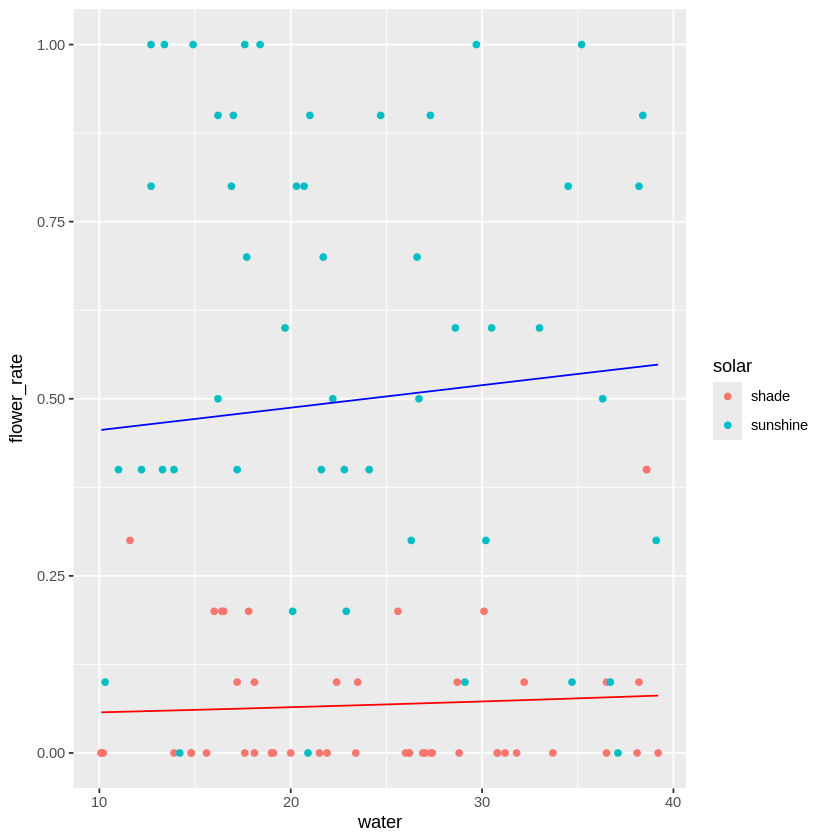

In [9]:
# 算出したロジスティック関数を可視化する
library(ggplot2)

beta0 <- -2.926732
beta1 <- 0.012712
beta2 <- 2.622126

g <- ggplot(data=data, aes(x=water, y=flower_rate))
g <- g + geom_point(aes(colour=solar))
g <- g + stat_function(fun=function(x) 1/(1+exp(-(beta0+beta1*x+beta2))), color = "blue") # sunshin条件下の回帰
g <- g + stat_function(fun=function(x) 1/(1+exp(-(beta0+beta1*x))), color = "red")        # shade条件下の回帰
g

** Q. 課題２について そもそもなぜいきなりポアソン分布が出てくるのか不明だった。**

A. 前の方の回答を参照。

**Q. 課題１の場合だと、説明変数の片方が、日なたか日陰かという質的データで、もう片方が量的データなので、色分けしたグラフが書きやすかったが、説明変数の両方が量的データだとどのようにグラフを描けばよいのか？**

**Q. 課題２の、数値ごとに色分けする方法がわかりませんでした**

A. グラデーションでプロットに色を付ける、階級で分けてグループごとに色分けをする、等の方法があります。

In [10]:
# 各湿度と気温における種子生成数のデータ
data <- read.csv("https://raw.githubusercontent.com/slt666666/biostatistics_text_wed/refs/heads/main/source/_static/data/chapter9_hw2.csv")
head(data)

result <- glm(seed_num ~ moisture + temperature, family = poisson(link = "log"), data = data)
summary(result)

,seed_num,moisture,temperature
,<int>,<dbl>,<int>
1,0,0.7,20
2,2,0.9,30
3,0,1.4,20
4,0,2.1,20
5,0,3.3,20
6,0,3.9,20



Call:
glm(formula = seed_num ~ moisture + temperature, family = poisson(link = "log"), 
    data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.18781    0.71371  -5.868 4.42e-09 ***
moisture     0.07414    0.01365   5.431 5.60e-08 ***
temperature  0.14078    0.02783   5.059 4.22e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 124.484  on 49  degrees of freedom
Residual deviance:  26.282  on 47  degrees of freedom
AIC: 132.65

Number of Fisher Scoring iterations: 5


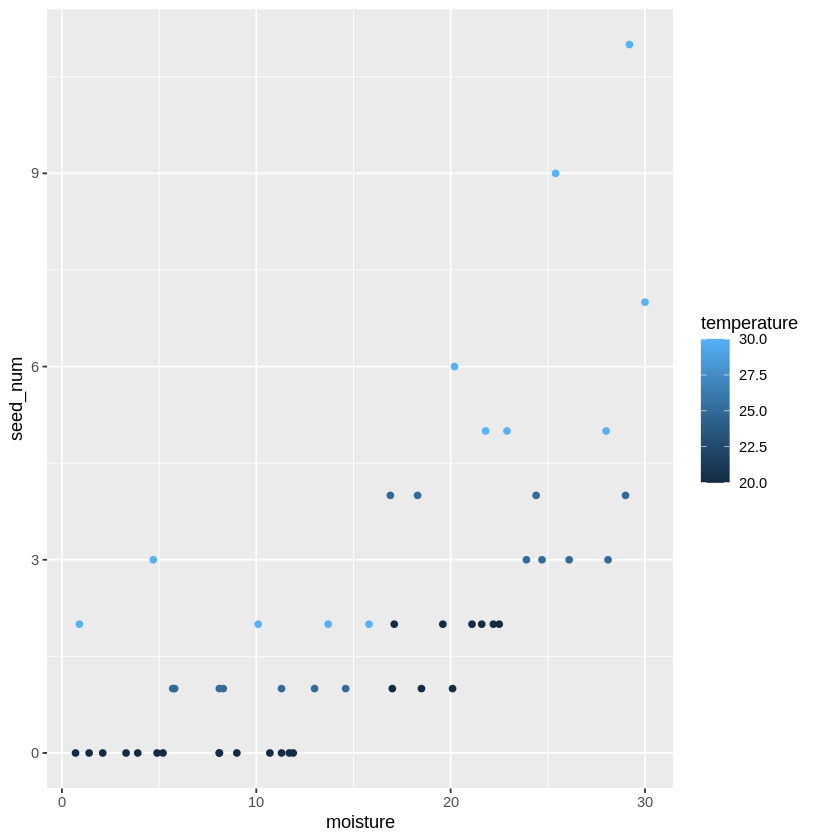

In [12]:
# 気温はグラデーションで可視化
library(ggplot2)

g <- ggplot(data=data, aes(x=moisture, y=seed_num))
g <- g + geom_point(aes(colour=temperature))
g